<a href="https://colab.research.google.com/github/bbucalonserra/demand-forecasting-and-planning/blob/main/Sales_Forecasting_Planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demand Forecasting

## Exploratory Data Analysis

First let's import the libraries.

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.special import inv_boxcox
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
# Dataset of orders
order_demand_df = pd.read_csv("https://raw.githubusercontent.com/bbucalonserra/demand-forecasting-and-planning/refs/heads/main/dataset/weekley_demand.csv", delimiter = ',')

# Data ser for testing
order_demand_test_df = pd.read_csv("https://raw.githubusercontent.com/bbucalonserra/demand-forecasting-and-planning/refs/heads/main/dataset/test.csv", delimiter = ',')

In [ ]:
order_demand_test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [ ]:
# Check dataset
order_demand_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
# Check dataset
order_demand_df.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [ ]:
# Types
order_demand_df.dtypes

,0
id,int64
week,int64
center_id,int64
meal_id,int64
checkout_price,float64
base_price,float64
emailer_for_promotion,int64
homepage_featured,int64
num_orders,int64


In [ ]:
# Transforming the categorical values
order_demand_df['center_id'] = order_demand_df['center_id'].astype(str)
order_demand_df['meal_id'] = order_demand_df['meal_id'].astype(str)

In [ ]:
# General Statistics
order_demand_df.describe()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


Checking relationships between the number of ordens and meal id.

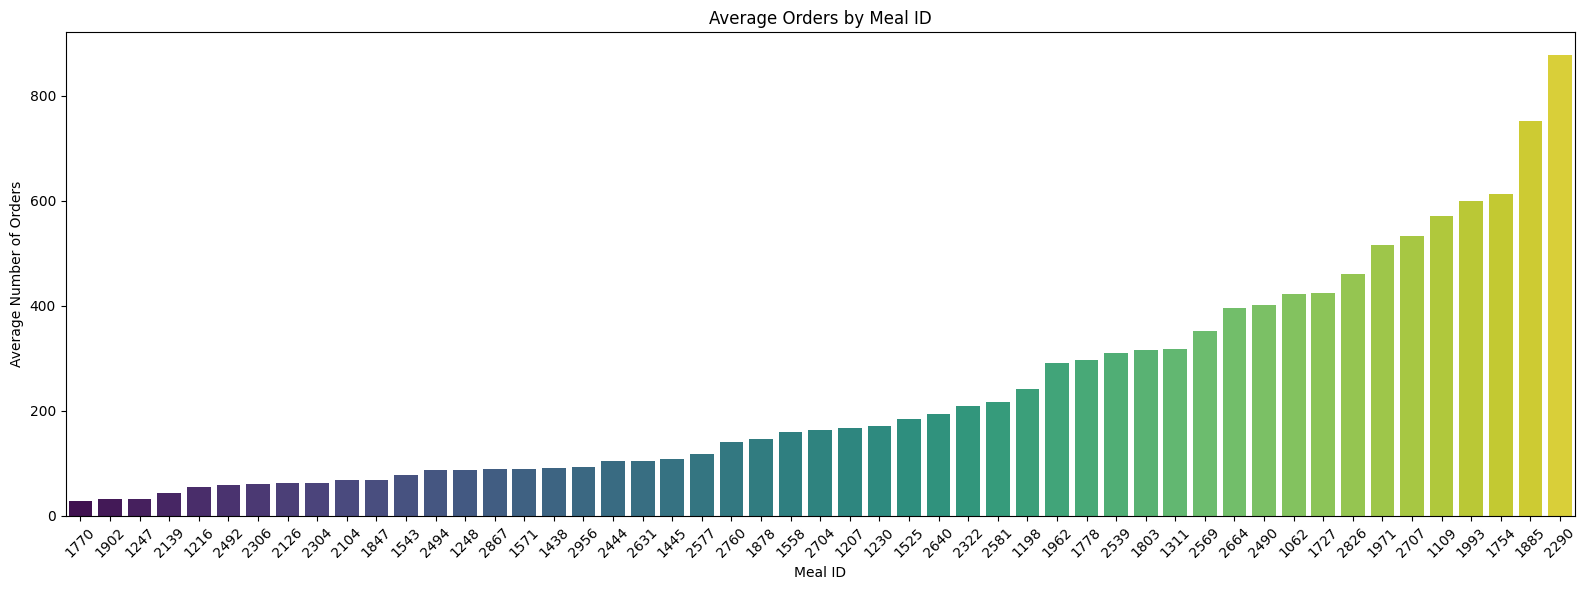

In [ ]:
# Grouping by meal_id and calculating the average of num_orders
mean_orders_by_meal = order_demand_df.groupby('meal_id')['num_orders'].mean().reset_index()

# Sorting the data by the average of num_orders in ascending order
mean_orders_by_meal = mean_orders_by_meal.sort_values(by='num_orders', ascending=True)

# Creating a graph to visualize the relationship, with the defined order
plt.figure(figsize=(16, 6))
sns.barplot(data=mean_orders_by_meal, x='meal_id', y='num_orders', palette='viridis', order=mean_orders_by_meal['meal_id'])
plt.title('Average Orders by Meal ID')
plt.xlabel('Meal ID')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Checking the relationship between number of orders and center id.

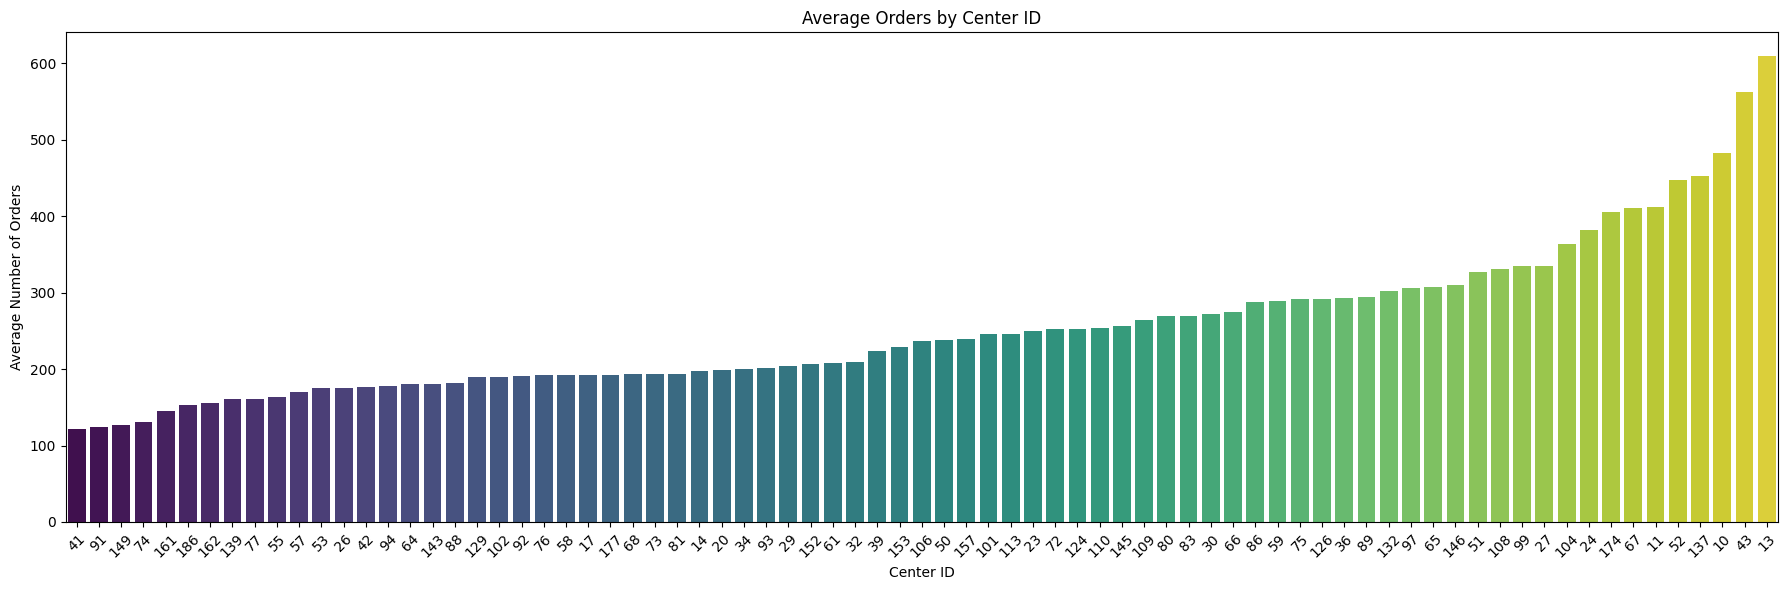

In [ ]:
# Grouping by center_id and calculating the average of num_orders
mean_orders_by_center = order_demand_df.groupby('center_id')['num_orders'].mean().reset_index()

# Sorting the data by the average of num_orders in ascending order
mean_orders_by_center = mean_orders_by_center.sort_values(by='num_orders', ascending=True)

# Creating a graph to visualize the relationship, with the defined order
plt.figure(figsize=(18, 6))
sns.barplot(data=mean_orders_by_center, x='center_id', y='num_orders', palette='viridis', order=mean_orders_by_center['center_id'])
plt.title('Average Orders by Center ID')
plt.xlabel('Center ID')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Creating a datasets grouping the number of orders per week.

In [ ]:
# Creating a new dataset grouped by orders
demand_week_df = order_demand_df.groupby('week')['num_orders'].sum()

# Print
demand_week_df.head()

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675


Checking general statistics.

In [ ]:
demand_week_df.describe()

,num_orders
count,1.450000e+02
mean,8.245344e+05
std,1.256703e+05
min,3.800650e+05
25%,7.451930e+05
50%,8.096250e+05
75%,8.926310e+05
max,1.303457e+06


As we can see, the min and max are really far away from the mean, lets check if they are outliers.

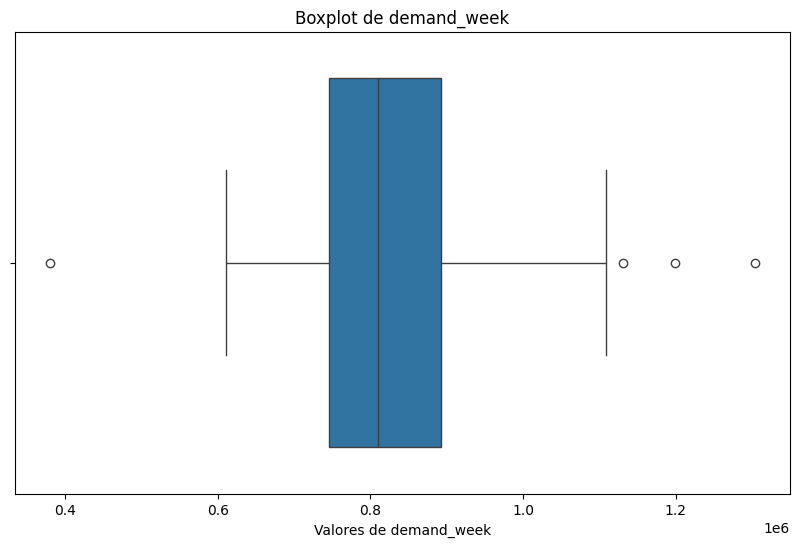

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=demand_week_df)
plt.title('Boxplot de demand_week')
plt.xlabel('Valores de demand_week')
plt.show()

Plotting into a chart in order to understand the patterns.

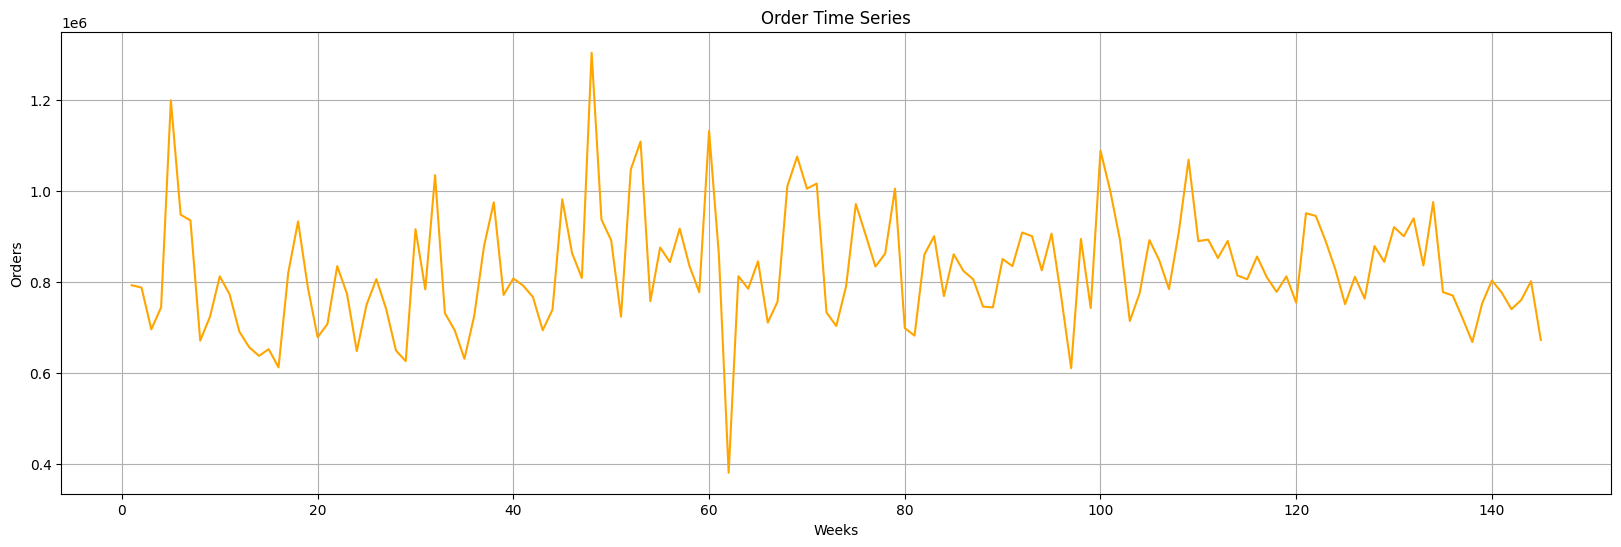

In [ ]:
# Plot in a chart
plt.figure(figsize=(20, 6))
sns.lineplot(data=demand_week_df, color='orange')
plt.title('Order Time Series')
plt.xlabel('Weeks')
plt.ylabel('Orders')
plt.grid(True)
plt.show()

## Decompose of Original Series
A decomposition of a series can be given by:

Additive: $Y_t = T_t + S_t + E_t$

Multiplicative: $Y_t = T_t \times S_t \times E_t$

Let's decompose our time series.

In [ ]:
# Creating an index for the series
index = pd.date_range(start = '2023-04-17 00:00:00', periods=len(demand_week_df), freq = 'W') # In this case, since we are using start without end, we must use the periods as the total number of instances

# Print
index

DatetimeIndex(['2023-04-23', '2023-04-30', '2023-05-07', '2023-05-14',
               '2023-05-21', '2023-05-28', '2023-06-04', '2023-06-11',
               '2023-06-18', '2023-06-25',
               ...
               '2025-11-23', '2025-11-30', '2025-12-07', '2025-12-14',
               '2025-12-21', '2025-12-28', '2026-01-04', '2026-01-11',
               '2026-01-18', '2026-01-25'],
              dtype='datetime64[ns]', length=145, freq='W-SUN')

In [ ]:
# Creating a df
demand_week_df = demand_week_df.reset_index()

# Adding the index into the dataset and setting as the index
demand_week_df = demand_week_df.set_index(index)

# Creating a series by selecting only one column (one dimension = series)
demand_week = demand_week_df['num_orders']

# Print
demand_week

,num_orders
2023-04-23,792261
2023-04-30,787084
2023-05-07,695262
2023-05-14,743529
2023-05-21,1198675
...,...
2025-12-28,776240
2026-01-04,739661
2026-01-11,759926
2026-01-18,801197


In [ ]:
# Seasonal decompose
decompose_result = seasonal_decompose(demand_week, model = 'additive') # One column must be passed

Now, let's plot.

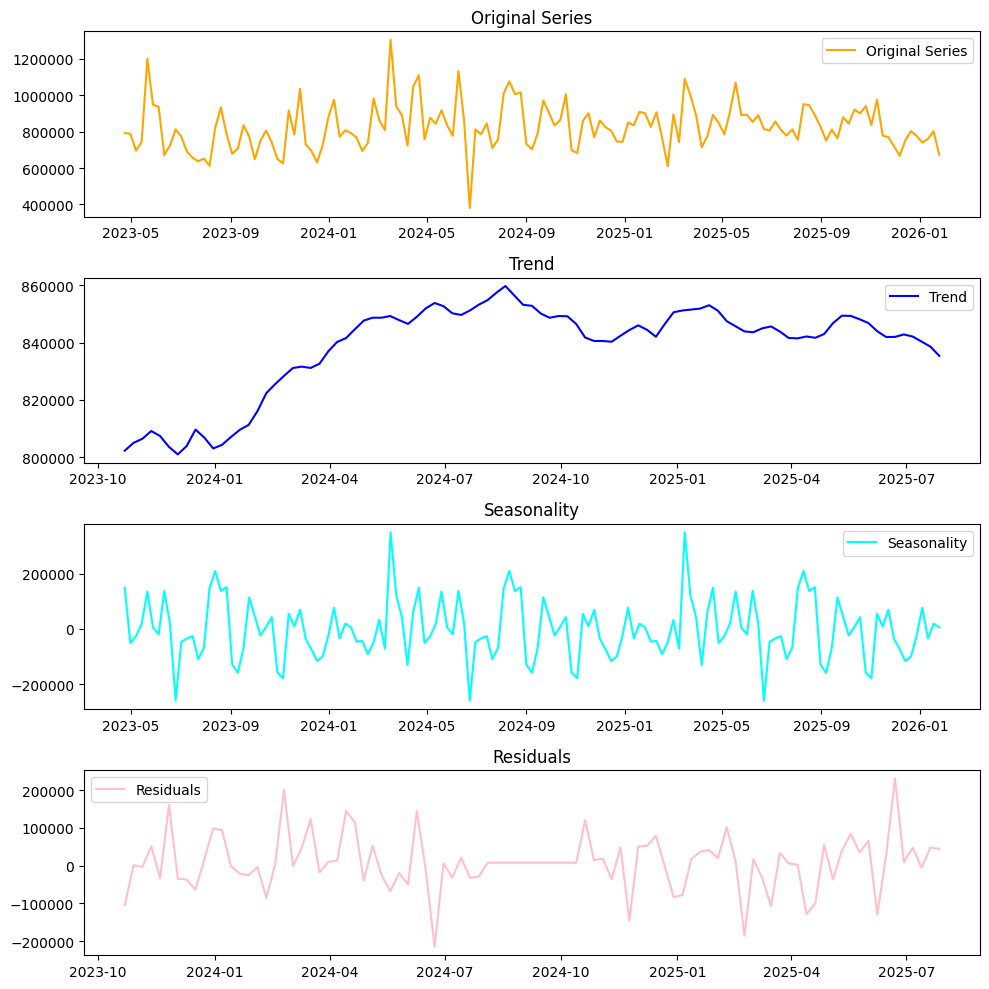

In [ ]:
# Plot
plt.figure(figsize=(10, 10))

# Primeiro gráfico
plt.subplot(411)  # 4 subplots, 1 coluna, primeiro gráfico
plt.plot(demand_week, label='Original Series', color='orange')  # Usar o índice explicitamente
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.title('Original Series')

# Segundo gráfico
plt.subplot(412)  # 4 subplots, 1 coluna, segundo gráfico
plt.plot(decompose_result.trend.index, decompose_result.trend, label='Trend', color='blue')  # Usar o índice explicitamente
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.title('Trend')

# Terceiro gráfico
plt.subplot(413)  # 4 subplots, 1 coluna, terceiro gráfico
plt.plot(decompose_result.seasonal.index, decompose_result.seasonal, label='Seasonality', color='cyan')  # Usar o índice explicitamente
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.title('Seasonality')

# Quarto gráfico
plt.subplot(414)  # 4 subplots, 1 coluna, quarto gráfico
plt.plot(decompose_result.resid.index, decompose_result.resid, label='Residuals', color='pink')  # Usar o índice explicitamente
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.title('Residuals')

# Ajuste de layout
plt.tight_layout()
plt.show()


Analysis of our temporal series:

  * Tendency: there are a higher tendency started in January 2024, growing until September and stabilizing
  * Seasonality: we can se that the flutuations are cicilicals, so there are periods with higher and lower demand, but the amplitude of the sazonality is probably constant. IF we could consider a seasonality, would be annual
  * Residuals: they seems to have aleatority, but they have higher values

## Stationary Check

Let's check if this series are stationary or not. We'll use:
  * Dickey Fuller test
  * KPSS test

In [ ]:
# Test
df_test = adfuller(demand_week)

# Collecting variables from list
adf_statistic = df_test[0]
p_value = df_test[1]
lags_used = df_test[2]
n_obs = df_test[3]
critical_values = df_test[4]
schwarz_info_criterion = df_test[5]

# Printing results
print(f"The statistical test value is {adf_statistic}")
print(f"The p-value is {p_value}")
print(f"The lags used are {lags_used}")
print(f"The number of observations are {n_obs}")
print(f"The critical values are {critical_values}")
print(f"The schwarz information is {schwarz_info_criterion}")

The statistical test value is -2.5428657726674446
The p-value is 0.10538983404031221
The lags used are 9
The number of observations are 135
The critical values are {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}
The schwarz information is 3403.6360177094266


For the **Dickey Fuller test**, we'll check if our series has unit root:
  * H0 = unit root, meaning non stacionary series
  * Ha ≠ unit root, meaning stacionary series

  With 95% confidence, the series IS NOT stacionary.

Now, we'll use KPSS.

In [ ]:
# Test
kpss_test = kpss(demand_week)

# Collecting variables from list
adf_statistic = kpss_test[0]
p_value = kpss_test[1]
lags_used = kpss_test[2]
schwarz_info_criterion = kpss_test[3]

# Printing results
print(f"The statistical test value is {adf_statistic}")
print(f"The p-value is {p_value}")
print(f"The lags used are {lags_used}")
print(f"The critical values are {schwarz_info_criterion}")

The statistical test value is 0.30631905710656926
The p-value is 0.1
The lags used are 2
The critical values are {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


For the **KPSS test**:
  * H0 = stacionary series
  * Ha ≠ stacionary series

With KPSS, they are stacionary.

In non of the options our series is stacionary. Let's start with the differentiations.

## Transformations to Stationarity
A stacionary series are the ones with:
* Constant tendency (which means, the mean ir constant)
* Constant variance
* Constant covariance

There are several ways to transform a series into a stacionary, they are:
* **Integration, the best way and more used**
* Logarithmic transformation
* Boxcox transformation
* Rooth square transformation


### Integration

Now let's create the periods and differentiations.

**The differentiation is usually really good in treating the tendency.**

In [ ]:
# Creating two copies of our dataset for differentiation and periods
demand_diff = demand_week.copy()
demand_periods = demand_week.copy()

# Creating dataframes
demand_diff_df = pd.DataFrame(demand_periods, columns=['num_orders'])
demand_periods_df = pd.DataFrame(demand_periods, columns=['num_orders'])

Creating the periods from lag = 1 untill lag = 3.

In [ ]:
# Creating periods
demand_periods_df['lag_one'] = demand_week.diff(periods = 1)
demand_periods_df['lag_two'] = demand_week.diff(periods = 2)
demand_periods_df['lag_three'] = demand_week.diff(periods = 3)

# Print
demand_periods_df.head()

,num_orders,lag_one,lag_two,lag_three
2023-04-23,792261,NaN,NaN,NaN
2023-04-30,787084,-5177.0,NaN,NaN
2023-05-07,695262,-91822.0,-96999.0,NaN
2023-05-14,743529,48267.0,-43555.0,-48732.0
2023-05-21,1198675,455146.0,503413.0,411591.0


Creating differentiations from 1 to 3.

In [ ]:
# Creating differentiations
demand_diff_df['first_diff'] = demand_week_df['num_orders'].diff()
demand_diff_df['second_diff'] = demand_week_df['num_orders'].diff().diff()
demand_diff_df['third_diff'] = demand_week_df['num_orders'].diff().diff().diff()

# Print
demand_diff_df.head()

,num_orders,first_diff,second_diff,third_diff
2023-04-23,792261,NaN,NaN,NaN
2023-04-30,787084,-5177.0,NaN,NaN
2023-05-07,695262,-91822.0,-86645.0,NaN
2023-05-14,743529,48267.0,140089.0,226734.0
2023-05-21,1198675,455146.0,406879.0,266790.0


In [ ]:
# Creating series for each differentiation
demand_week_first_diff = demand_diff_df['first_diff'].dropna()
demand_week_second_diff = demand_diff_df['second_diff'].dropna()
demand_week_third_diff = demand_diff_df['third_diff'].dropna()

Note that differentiation is different than periods. Periods are basically a lag from our initial period. The differentiation must be done according to the last differentiation.

Let's check now the seasonal decompose.

In [ ]:
# Seasonal decompose
diff_decompose_result = seasonal_decompose(demand_week_first_diff, model = 'additive') # One column must be passed

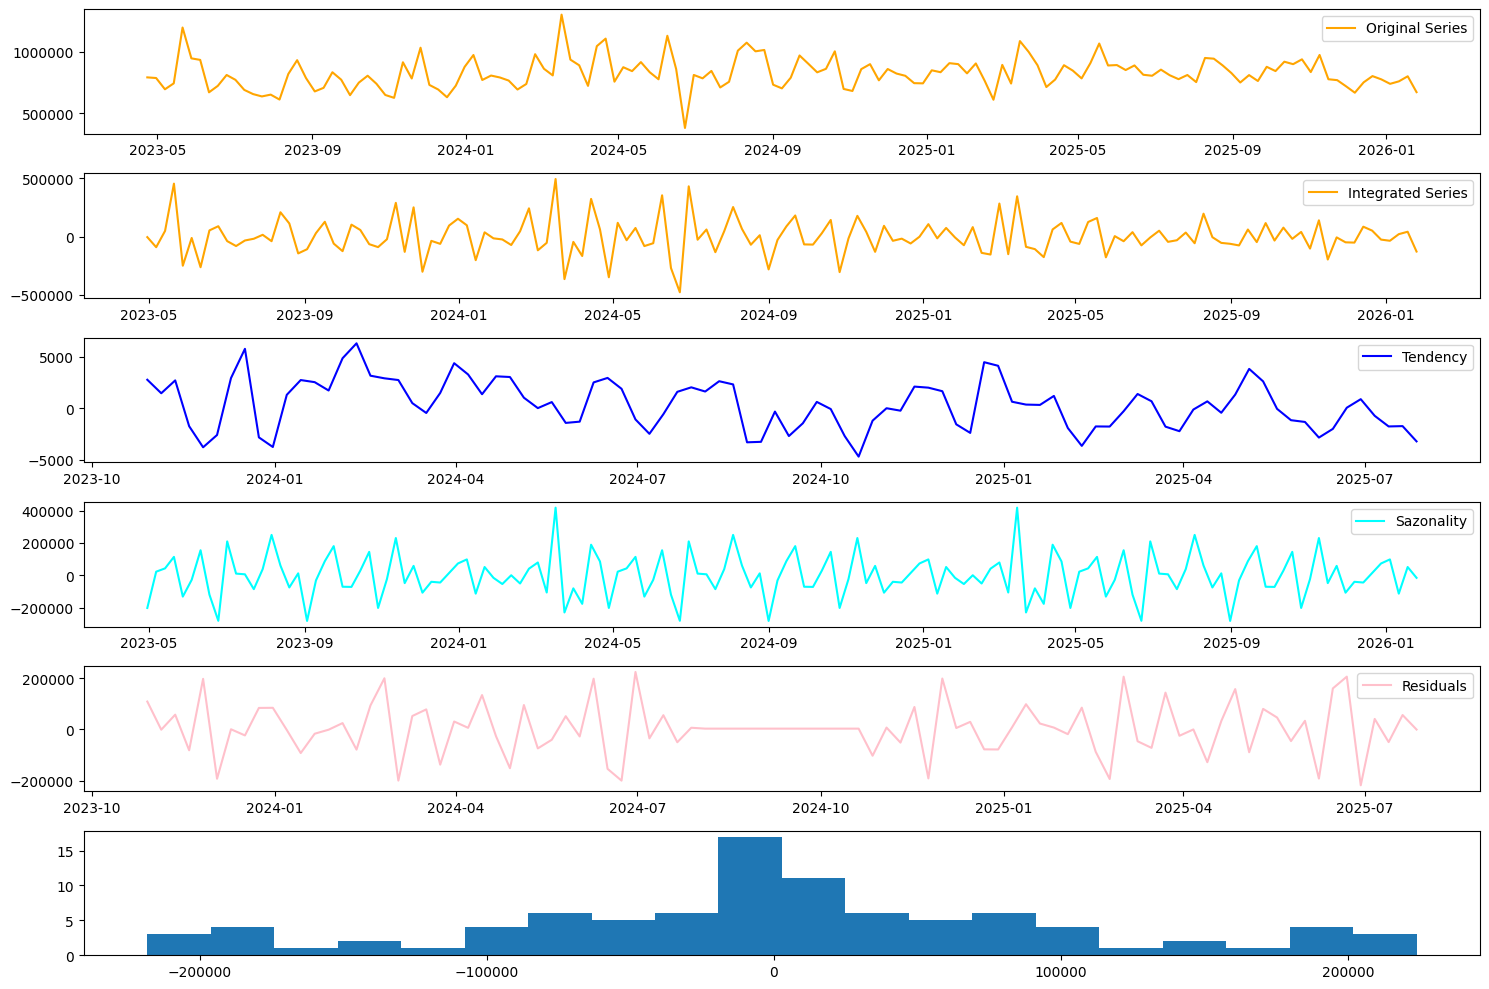

In [ ]:
# Plot
plt.figure(figsize = (15,10))

# Original chart
plt.subplot(611)
plt.plot(demand_week, label = 'Original Series', color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Integrated chart
plt.subplot(612)
plt.plot(demand_week_first_diff, label = 'Integrated Series', color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Integrated Tendency
plt.subplot(613)
plt.plot(diff_decompose_result.trend, label = 'Tendency', color = 'blue')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Integrated Sazonality
plt.subplot(614)
plt.plot(diff_decompose_result.seasonal, label = 'Sazonality', color = 'cyan')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Integrated Residuals
plt.subplot(615)
plt.plot(diff_decompose_result.resid, label = 'Residuals', color = 'pink')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Integrated Residuals histogram
plt.subplot(616)
plt.hist(diff_decompose_result.resid, bins = 20, label = 'Residuals Histogram')
plt.ticklabel_format(style='plain', axis='y')

# Show
plt.tight_layout()
plt.show()

**Let's compare the tendency from our original series with the first differentiation.**

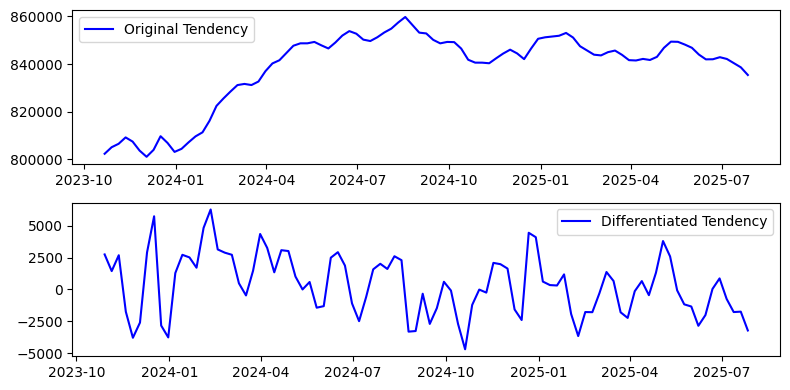

In [ ]:
# Plot
plt.figure(figsize = (8,4))

# Original Tendency
plt.subplot(211)
plt.plot(decompose_result.trend, label = 'Original Tendency', color = 'blue')
plt.legend()

# Differentiated Tendency
plt.subplot(212)
plt.plot(diff_decompose_result.trend, label = 'Differentiated Tendency', color = 'blue')
plt.legend()

# Show
plt.tight_layout()
plt.show()

So, the tendency is now good. Let's validate with out statistical tests.


**NOTE: we can't calculate the coefficient of variation because it would be distorted due to the differentiation.**

In [ ]:
def check_stacionarity(series):
    # Perform statistical tests
    adf_test = adfuller(series)
    kpss_test = kpss(series)

    # Collecting values for Dickey-Fuller test
    adf_statistic = adf_test[0]
    adf_p_value = adf_test[1]
    adf_lags_used = adf_test[2]
    adf_n_obs = adf_test[3]
    adf_critical_values = adf_test[4]
    adf_schwarz_info_criterion = adf_test[5]

    # Collecting values for KPSS test
    kpss_statistic = kpss_test[0]
    kpss_p_value = kpss_test[1]
    kpss_lags_used = kpss_test[2]
    kpss_critical_values = kpss_test[3]

    # Print results
    results = (
        f"Dickey-Fuller Test:\n"
        f"  - Statistic: {adf_statistic}\n"
        f"  - p-value: {adf_p_value}\n"
        f"  - Lags used: {adf_lags_used}\n"
        f"  - Number of observations: {adf_n_obs}\n"
        f"  - Critical values: {adf_critical_values}\n"
        f"  - Schwarz information criterion: {adf_schwarz_info_criterion}\n\n"
        f"KPSS Test:\n"
        f"  - Statistic: {kpss_statistic}\n"
        f"  - p-value: {kpss_p_value}\n"
        f"  - Lags used: {kpss_lags_used}\n"
        f"  - Critical values: {kpss_critical_values}\n"
    )

    return results

In [ ]:
# First
print(check_stacionarity(demand_week_first_diff))

Dickey-Fuller Test:
  - Statistic: -6.674500921927528
  - p-value: 4.500695109329328e-09
  - Lags used: 8
  - Number of observations: 135
  - Critical values: {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}
  - Schwarz information criterion: 3383.7516432986404

KPSS Test:
  - Statistic: 0.16477886410344705
  - p-value: 0.1
  - Lags used: 34
  - Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



Now, according to both tests, the time series is stacionary. But let's try to find better results for variance.

### Logarithmic Transformation
We'll combine both transformations, since one was used for tendency and the other one for variance.
It is going to be applied the log and the differentiation, respectively.

**We must apply log before the differentiation in order to NOT HAVE negative values.**

In [ ]:
# Applying log
demand_log = np.log(demand_week).dropna()

In [ ]:
log_decompose_result = seasonal_decompose(demand_log, model = 'additive') # One column must be passed

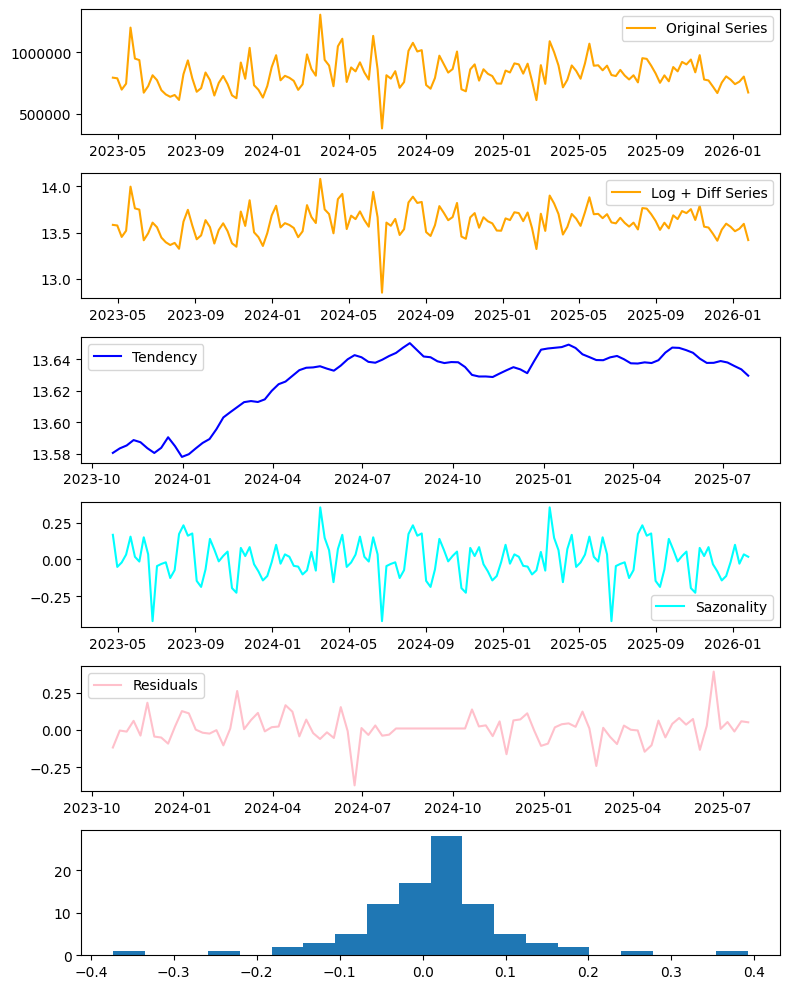

In [ ]:
# Plot
plt.figure(figsize = (8,10))

# Original chart
plt.subplot(611)
plt.plot(demand_week, label = 'Original Series', color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log chart
plt.subplot(612)
plt.plot(demand_log, label = 'Log + Diff Series', color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Tendency
plt.subplot(613)
plt.plot(log_decompose_result.trend, label = 'Tendency', color = 'blue')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Sazonality
plt.subplot(614)
plt.plot(log_decompose_result.seasonal, label = 'Sazonality', color = 'cyan')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Residuals
plt.subplot(615)
plt.plot(log_decompose_result.resid, label = 'Residuals', color = 'pink')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Residuals histogram
plt.subplot(616)
plt.hist(log_decompose_result.resid, bins = 20, label = 'Residuals Histogram')
plt.ticklabel_format(style='plain', axis='y')

# Show
plt.tight_layout()
plt.show()

Let's check the coefficient of variance:

CV = Standard Deviation / Mean * 100

In [ ]:
# Coefficient of Variation
series = [demand_week, demand_log]
result = []

for serie in series:
  calculus = np.std(serie) / np.mean(serie) * 100
  result.append(calculus)

# Print
print(f"For demand week, the CV is {round(result[0],2)}%")
print(f"For demand week in log, the CV is {round(result[1],2)}%")

For demand week, the CV is 15.19%
For demand week in log, the CV is 1.13%


In [ ]:
# Check statistics
print(check_stacionarity(demand_log))

Dickey-Fuller Test:
  - Statistic: -2.6531359386069795
  - p-value: 0.08250474140569314
  - Lags used: 9
  - Number of observations: 135
  - Critical values: {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}
  - Schwarz information criterion: -130.0740389253907

KPSS Test:
  - Statistic: 0.3659060621279954
  - p-value: 0.09185083528965714
  - Lags used: 2
  - Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



### Square Root Transformation
Let's check the square root.

In [ ]:
# Applying square root
demand_sqrt = np.sqrt(demand_week).dropna()

# Print
demand_sqrt

,num_orders
2023-04-23,890.090445
2023-04-30,887.177547
2023-05-07,833.823722
2023-05-14,862.281277
2023-05-21,1094.840171
...,...
2025-12-28,881.044834
2026-01-04,860.035464
2026-01-11,871.737346
2026-01-18,895.096084


In [ ]:
# Seasonal decompose
sqrt_decompose_result = seasonal_decompose(demand_sqrt, model = 'additive') # One column must be passed

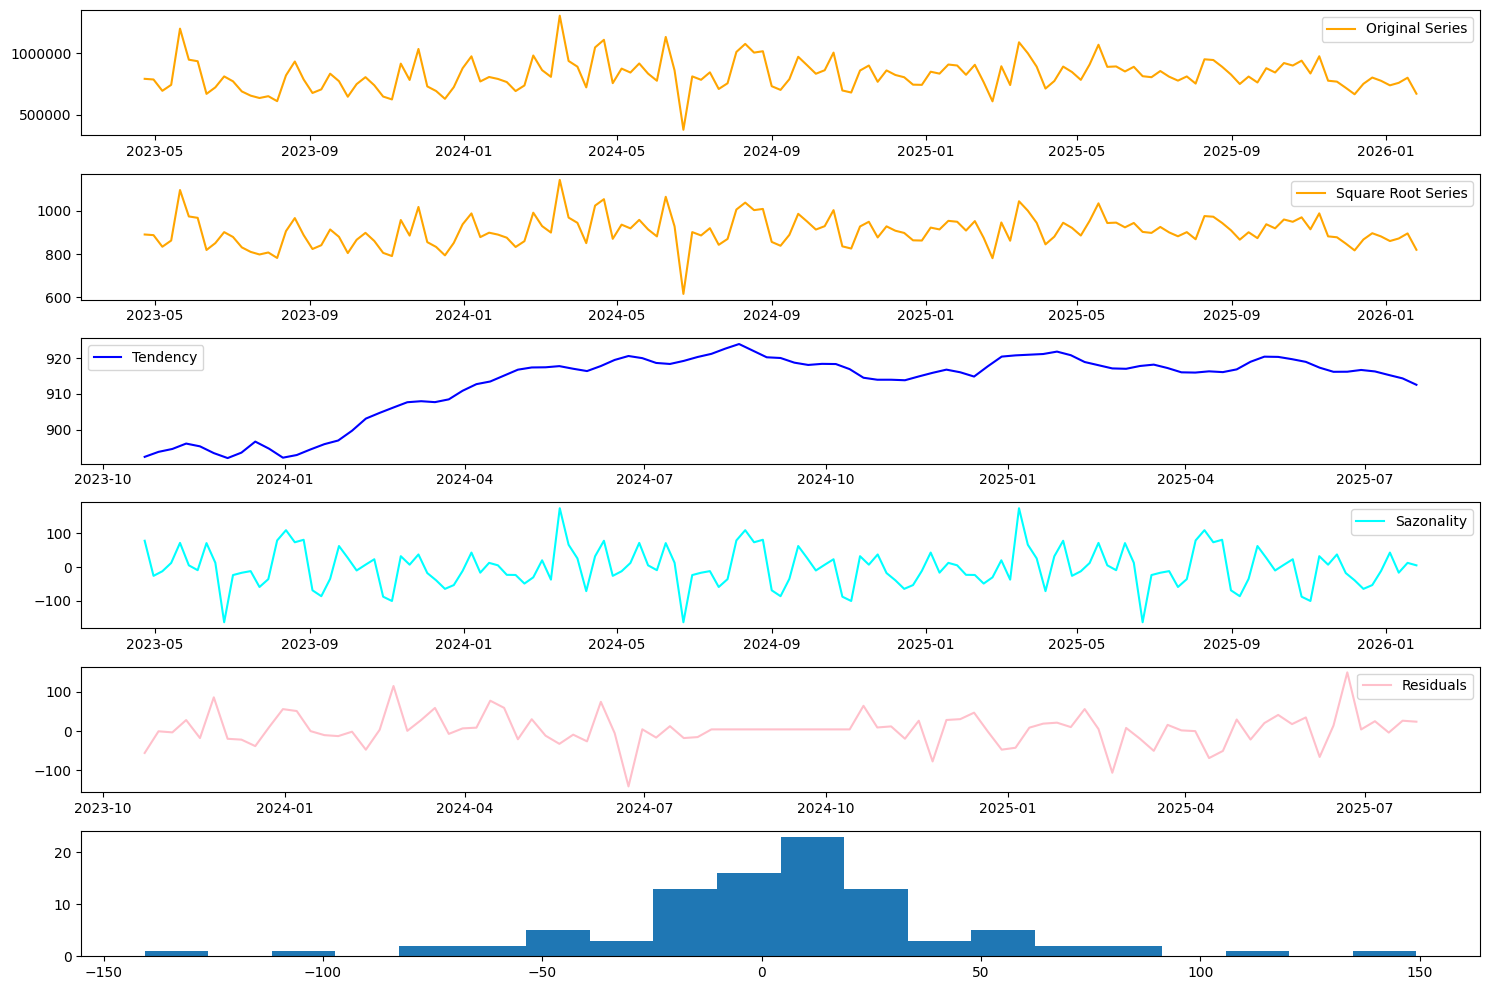

In [ ]:
# Plot
plt.figure(figsize = (15,10))

# Original chart
plt.subplot(611)
plt.plot(demand_week, label = 'Original Series', color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Sqrt chart
plt.subplot(612)
plt.plot(demand_sqrt, label = 'Square Root Series', color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Tendency
plt.subplot(613)
plt.plot(sqrt_decompose_result.trend, label = 'Tendency', color = 'blue')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Sazonality
plt.subplot(614)
plt.plot(sqrt_decompose_result.seasonal, label = 'Sazonality', color = 'cyan')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Residuals
plt.subplot(615)
plt.plot(sqrt_decompose_result.resid, label = 'Residuals', color = 'pink')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Residuals histogram
plt.subplot(616)
plt.hist(sqrt_decompose_result.resid, bins = 20, label = 'Residuals Histogram')
plt.ticklabel_format(style='plain', axis='y')

# Show
plt.tight_layout()
plt.show()

In [ ]:
# Coefficient of Variation
series = [demand_week, demand_sqrt]
result = []

for serie in series:
  calculus = np.std(serie) / np.mean(serie) * 100
  result.append(calculus)

# Print
print(f"For demand week, the CV is {round(result[0],2)}%")
print(f"For demand week in sqrt, the CV is {round(result[1],2)}%")

For demand week, the CV is 15.19%
For demand week in sqrt, the CV is 7.59%


In [ ]:
# Check statistics
print(check_stacionarity(demand_sqrt))

Dickey-Fuller Test:
  - Statistic: -2.5776685416899796
  - p-value: 0.0977011185622047
  - Lags used: 9
  - Number of observations: 135
  - Critical values: {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}
  - Schwarz information criterion: 1453.2595804606792

KPSS Test:
  - Statistic: 0.3377582864287592
  - p-value: 0.1
  - Lags used: 2
  - Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



Dickey-Fuller: not stationarity

KPSS: Stationarity

### Box Cox Transformation
Let's check the box cox transformation.

In [ ]:
# Calculating boxcox
demand_box_cox, lambda_param = stats.boxcox(demand_week)

# Creating an index for the series
index = pd.date_range(start = '2023-04-17 00:00:00', periods=len(demand_box_cox), freq = 'W')

# To series
demand_box_cox = pd.Series(demand_box_cox, index=index)

# Print
print(lambda_param)

0.4787776845629949


In [ ]:
# Apply the differentiation into boxcox
demand_box_cox = demand_box_cox.dropna()

In [ ]:
# Seasonal decompose
boxcox_decompose_result = seasonal_decompose(demand_box_cox, model = 'additive') # One column must be passed

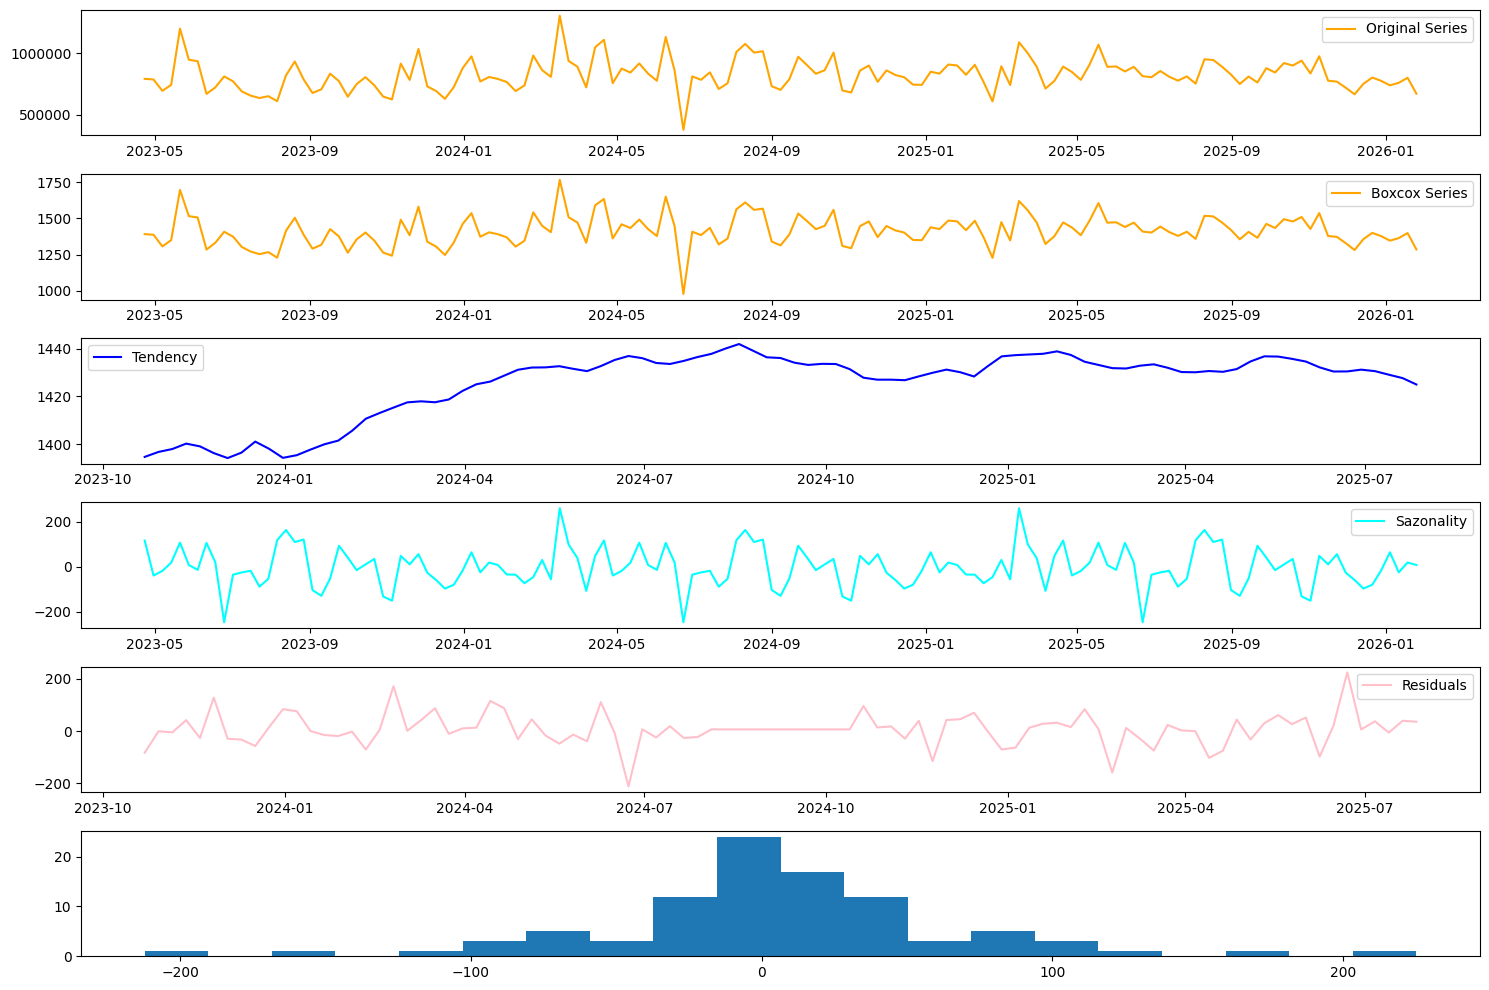

In [ ]:
# Plot
plt.figure(figsize = (15,10))

# Original chart
plt.subplot(611)
plt.plot(demand_week, label = 'Original Series', color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Boxbox chart
plt.subplot(612)
plt.plot(demand_box_cox, label = 'Boxcox Series', color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Tendency
plt.subplot(613)
plt.plot(boxcox_decompose_result.trend, label = 'Tendency', color = 'blue')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Sazonality
plt.subplot(614)
plt.plot(boxcox_decompose_result.seasonal, label = 'Sazonality', color = 'cyan')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Residuals
plt.subplot(615)
plt.plot(boxcox_decompose_result.resid, label = 'Residuals', color = 'pink')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# Log Residuals histogram
plt.subplot(616)
plt.hist(boxcox_decompose_result.resid, bins = 20, label = 'Residuals Histogram')
plt.ticklabel_format(style='plain', axis='y')

# Show
plt.tight_layout()
plt.show()

In [ ]:
# Coefficient of Variation
series = [demand_week, demand_box_cox]
result = []

for serie in series:
  calculus = np.std(serie) / np.mean(serie) * 100
  result.append(calculus)

# Print
print(f"For demand week, the CV is {round(result[0],2)}%")
print(f"For demand week using boxcox, the CV is {round(result[1],2)}%")

For demand week, the CV is 15.19%
For demand week using boxcox, the CV is 7.28%


In [ ]:
# Check statistics
print(check_stacionarity(demand_box_cox))

Dickey-Fuller Test:
  - Statistic: -2.5799853005387
  - p-value: 0.09720485678755897
  - Lags used: 9
  - Number of observations: 135
  - Critical values: {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}
  - Schwarz information criterion: 1558.4830073120252

KPSS Test:
  - Statistic: 0.3390418153597032
  - p-value: 0.1
  - Lags used: 2
  - Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



The best two transformations are: integration and logarithmic. For our model, the logarithmic is improving our variation and integration is improving our tendency, so, we'll use log transformation and than use the integration.

**NOTE: after the prediction we'll need to retransform it using exponencial because of our log.**

In [ ]:
# Integrating our log series
int_log_demand_week = demand_log.diff().dropna()

# Print
int_log_demand_week.head()

,num_orders
2023-04-30,-0.006556
2023-05-07,-0.124046
2023-05-14,0.067119
2023-05-21,0.477564
2023-05-28,-0.235369


In [ ]:
# Check statistics
print(check_stacionarity(int_log_demand_week))

Dickey-Fuller Test:
  - Statistic: -6.3793336207109075
  - p-value: 2.2425181406041392e-08
  - Lags used: 9
  - Number of observations: 134
  - Critical values: {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}
  - Schwarz information criterion: -122.59870529651778

KPSS Test:
  - Statistic: 0.1662686742571561
  - p-value: 0.1
  - Lags used: 33
  - Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



## Time Smoothing Model
The first model we'll test are the time smotothing. They are divided in three:
  * Simple Exponential Smoothing
  * Double Exponential Smoothing
  * Triple Exponential Smoothing

They are simple models that could be applied into easier data.

### Simple Exponential Smoothing
The SES is used when a series does not have tendency or seasonality

In [ ]:
# Train and test
ses_train, ses_test = demand_week[:104], demand_week[104:]


# Simple Exponential Smoothing
simple = SimpleExpSmoothing(ses_train)


# Variable
fit_simple = simple.fit(optimized=True)  #If we don't specify the smoothing level, it will find the lower values for MSE and RMSE

# Summary
print(fit_simple.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:             num_orders   No. Observations:                  104
Model:             SimpleExpSmoothing   SSE                  1995446444077.044
Optimized:                       True   AIC                           2466.460
Trend:                           None   BIC                           2471.749
Seasonal:                        None   AICC                          2466.864
Seasonal Periods:                None   Date:                 Tue, 08 Oct 2024
Box-Cox:                        False   Time:                         16:04:26
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0510465                alpha                 True
initial_level             7.9226e+05                

Now, lets calculate the evaluation metrics (RMSE and MSE) using the cross validaton for time series.

In [ ]:
# Initialize TimeSeriesSplit
ses_tscv = TimeSeriesSplit(n_splits=3)

# List to store results
ses_mse_scores = []

# Executing TimeSeriesSplit
for train_index, test_index in ses_tscv.split(demand_week):
    # Splitting the data
    ses_train, ses_test = demand_week[train_index], demand_week[test_index]

    # Fitting the Simple Exponential Smoothing model
    simple = SimpleExpSmoothing(ses_train).fit(optimized=True)

    # Making predictions
    ses_pred = simple.forecast(steps=len(ses_test))

    # Calculating the MSE
    mse = mean_squared_error(ses_test, ses_pred)

    # Storing the result
    ses_mse_scores.append(mse)

# Calculating the average MSE and RMSE
ses_mean_mse = np.mean(ses_mse_scores)
ses_mean_rmse = np.sqrt(ses_mean_mse)

# Displaying final results
print(f'Average MSE: {ses_mean_mse}')
print(f'Average RMSE: {ses_mean_rmse}')

Average MSE: 16639453253.8425
Average RMSE: 128994.00472053925


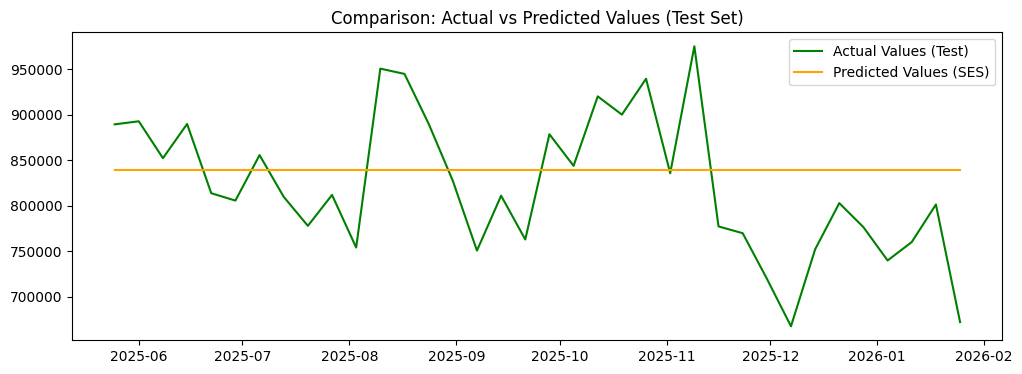

In [ ]:
# Prediction
ses_pred = fit_simple.forecast(steps=len(ses_test))  # We need the number of steps for the prediction, so we'll use the size of ses_test.

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(ses_test.index, ses_test, label="Actual Values (Test)", color='green')
plt.plot(ses_test.index, ses_pred, label="Predicted Values (SES)", color='orange')
plt.legend()
plt.title("Comparison: Actual vs Predicted Values (Test Set)")
plt.show()

### Double Exponential Smoothing
The DES considers the tendency in the data.

In [ ]:
# Train and test
des_train, des_test = demand_week[:104], demand_week[104:]

# Double Exponential Smoothing
double_exponential = ExponentialSmoothing(des_train, trend='add').fit()

# Summary
print(double_exponential.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               num_orders   No. Observations:                  104
Model:             ExponentialSmoothing   SSE                  2020118923434.721
Optimized:                         True   AIC                           2471.738
Trend:                         Additive   BIC                           2482.315
Seasonal:                          None   AICC                          2472.604
Seasonal Periods:                  None   Date:                 Tue, 08 Oct 2024
Box-Cox:                          False   Time:                         16:04:28
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0757143                alpha                 True
smoothing_trend               0.00

In [ ]:
# Initialize TimeSeriesSplit
des_tscv = TimeSeriesSplit(n_splits=3)

# List to store results
des_mse_scores = []

# Executing TimeSeriesSplit
for train_index, test_index in des_tscv.split(demand_week):
    # Splitting the data
    des_train, des_test = demand_week[train_index], demand_week[test_index]

    # Fitting the Simple Exponential Smoothing model
    double_exponential = ExponentialSmoothing(des_train, trend='add').fit()

    # Making predictions
    des_pred = double_exponential.forecast(steps=len(des_test))

    # Calculating the MSE
    des_mse = mean_squared_error(des_test, des_pred)

    # Storing the result
    des_mse_scores.append(des_mse)

# Calculating the average MSE and RMSE
des_mean_mse = np.mean(des_mse_scores)
des_mean_rmse = np.sqrt(des_mean_mse)

# Displaying final results
print(f'Average MSE: {des_mean_mse}')
print(f'Average RMSE: {des_mean_rmse}')

Average MSE: 18153458187.734695
Average RMSE: 134734.76978024156


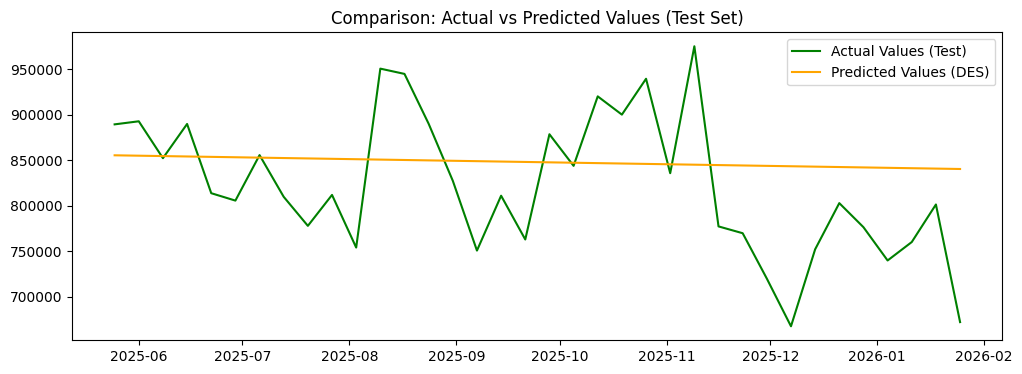

In [ ]:
# Prediction
des_pred = double_exponential.forecast(steps=len(des_test))  # We need the number of steps for the prediction, so we'll use the size of ses_test.

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(des_test.index, des_test, label="Actual Values (Test)", color='green')
plt.plot(des_test.index, des_pred, label="Predicted Values (DES)", color='orange')
plt.legend()
plt.title("Comparison: Actual vs Predicted Values (Test Set)")
plt.show()

### Triple Exponential Smoothing (Holt-Winters)
The TES considers the tendency and the seasonality.

In [ ]:
# Train and test
tes_train, tes_test = demand_week[:104], demand_week[104:]

# Simple Exponential Smoothing
triple_exponential = ExponentialSmoothing(tes_train, trend='add', seasonal='add', seasonal_periods=52).fit()

# Pred
tes_pred = triple_exponential.forecast(steps=len(tes_test))

# Summary
print(triple_exponential.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               num_orders   No. Observations:                  104
Model:             ExponentialSmoothing   SSE                  1613531002700.148
Optimized:                         True   AIC                           2552.366
Trend:                         Additive   BIC                           2700.452
Seasonal:                      Additive   AICC                          2704.455
Seasonal Periods:                    52   Date:                 Tue, 08 Oct 2024
Box-Cox:                          False   Time:                         16:23:17
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_trend          

Now, we can't use the division in folds due to the quantity of seasons of our dataset. So, we'll just calculate the RMSE and MSE.

In [ ]:
# MSE and RMSE
mse_tes = mean_squared_error(tes_test, tes_pred)
rmse_tes = np.sqrt(mse_tes)
mean_tes = np.mean(tes_test)

# Print results
print("Triple: MSE =", mse_tes, ", RMSE =", rmse_tes)

Triple: MSE = 21930830320.425888 , RMSE = 148090.6152341393


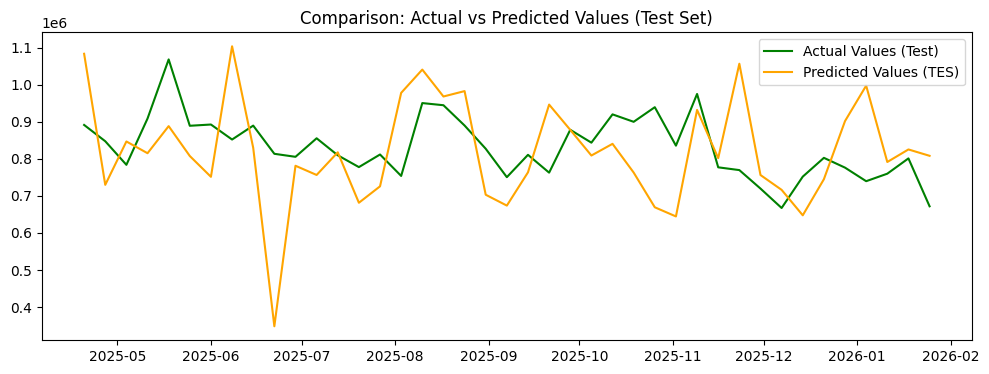

In [ ]:
# Prediction
tes_pred = triple_exponential.forecast(steps=len(tes_test))  # We need the number of steps for the prediction, so we'll use the size of ses_test.

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(tes_test.index, tes_test, label="Actual Values (Test)", color='green')
plt.plot(tes_test.index, tes_pred, label="Predicted Values (TES)", color='orange')
plt.legend()
plt.title("Comparison: Actual vs Predicted Values (Test Set)")
plt.show()

## ARIMA Model
For this scenario, we'll first choose the ARIMA model in order to predict our data. This model uses the Auto-regressive (p), Integration (d) and Moving Averages (q) to predict the data. It can be written with:

`ARIMA = (p, d, q)`

For the integration, we aready found that the first integration is enough to make our series stacionary, now, we should check the Auto-regressive and moving averages.

An ARIMA model is generally denoted as $ ARIMA(p, d, q) $, where:

$y_t' = c + \phi_1 y_{t-1}' + \cdots + \phi_p y_{t-p}' + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q} + \varepsilon_t$

% Explanation of the components:
1. $y_t'$: differenced time series
2. $c$: intercept
3. $\phi_1, \ldots, \phi_p$: coefficients of the autoregressive part
4. $\theta_1, \ldots, \theta_q$: coefficients of the moving average part
5. $\varepsilon_t$: random error at time $t$


**NOTE: SARIMA will not be used because our data does not looks sazonal.**


### Auto Regressive
Search for `p` variable (Auto Regressive). **For this, we'll use the PACF (Partial AUto Correlation Function)**, that measures the correlation between the LAG 0 and the other LAGs, but, it doesn't consider the correlation between the intermediary values. For example: for the LAG 3, it doesn't consider the LAG 2 and LAG 1 to measure the PACF.

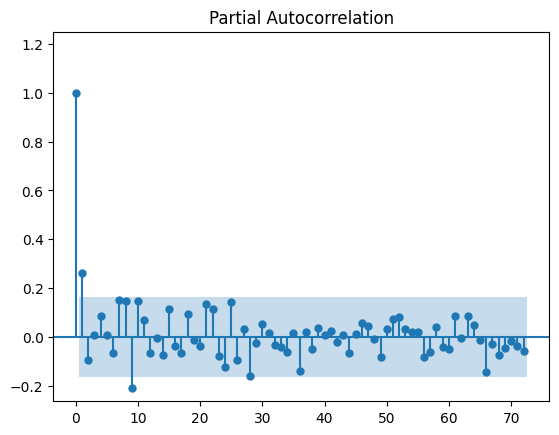

In [ ]:
# Plot PACF

plot_pacf(demand_log, auto_ylims = True, lags = 72)
plt.show()

In this case, the first vertical line is the correlation beteween the values and theirselfs, so, it will always be 1. We need to not consider this value and go for the other ones.

**The hatched area are the confidence intervals, meaning that all values are statistically zero.**

Each value in the x axis is the LAG, we must choose the one that best fits. In this case, we could go for:
  * LAG = 1

### Moving Averages

Search for `Q` variable (Moving Average). **For this, we'll use the ACF (Auto Correlation Function)**, that measures the correlation between the LAG 0 and the other LAGs, but now it consider the intermediary values.

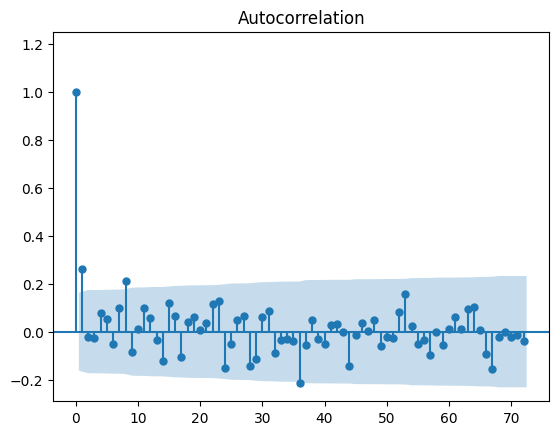

In [ ]:
# Plot
plot_acf(demand_log, auto_ylims = True, lags = 72)
plt.show()

In this case, the first vertical line is the correlation beteween the values and theirselfs, so, it will always be 1. We need to not consider this value and go for the other ones.

**The hatched area are the confidence intervals, meaning that all values are statistically zero.**

Each value in the x axis is the LAG, we must choose the one that best fits. In this case, we could go for:
  * LAG = 1
NOTE: we are always searching for "easier" models, so, we'll not go for high LAGS

Box and Jenkins created a table to support the usage of the models according to the ACF and PACF, it is:


| ACF                                           | PACF                                         | Model to be tried                        |
|-----------------------------------------------|---------------------------------------------|------------------------------------------|
| Gradual or sinusoidal decline up to zero      | Abrupt decline after lag p                  | AR(p)                                   |
| Abrupt decline after lag q                    | Gradual or sinusoidal decline up to zero    | MA(q)                                   |
| Abrupt decline after lag q                    | Abrupt decline after lag p                  | Choose the best between AR(p) and MA(q) |
| Gradual or sinusoidal decline up to zero      | Gradual or sinusoidal decline up to zero    | ARMA model                               |
| No significant spikes                         | No significant spikes                       | Series is random or white noise         |
| Spikes at fixed intervals                     | Spikes at fixed intervals                   | The series has seasonality               |
| Does not decay to zero or takes a long time  | -                                           | The series is not stationary             |


There are abrupt declin after lag from ACF and PACF, so we'll choose the best model between AR(p) and MA (q)

### Plotting the Model

#### Model 1 - AR(p)

In [ ]:
# Creating model
model1 = ARIMA(demand_log, order = (1,1,0))

# Fiting the model
ar_model = model1.fit()

# Print results
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  44.329
Date:                Tue, 08 Oct 2024   AIC                            -84.658
Time:                        16:04:32   BIC                            -78.718
Sample:                    04-23-2023   HQIC                           -82.245
                         - 01-25-2026                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3051      0.055     -5.515      0.000      -0.414      -0.197
sigma2         0.0316      0.002     14.715      0.000       0.027       0.036
Ljung-Box (L1) (Q):                   1.42   Jarque-

From the summary above:
  * AIC = 18.23 and BIC = 24.16
  * For our sigma2 and ar.L1, our P is lower than 0.05, so they are statistically significant
  * Ljung-Box verify if the residuals has any correlations until a specific LAG. So: H0: the correlations among the residuals until lag K are zero, HA: the correlations among the residuals until lag K are NOT zero. In thise case, we can reject the H0, **we can't reject the fact that correlations among residuals are zero**
  *  Jarque-Bera (JB) verify the residuals normality. It uses teh skew and kurtosis. So, H0: data follows the normal distribution, HA: data does not follows the normal distribution. In our case, **we can reject the fact that the data migh follow a normal distribution**

Also, the equation in this case is given by:

$\Delta Y_t = \phi y_{1} + \varepsilon_t$

Where, $\phi$ = `ar.L1` and $\varepsilon_t$ = `sigma2`

By replacing the values, we have:

$\Delta Y_t$ = -0.31 $y_{1}$ + 0.03

#### Model 2 - MA(q)

In [ ]:
model2 = ARIMA(demand_log, order = (0,1,1))
ma_model = model2.fit()

print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  64.242
Date:                Tue, 08 Oct 2024   AIC                           -124.484
Time:                        16:04:32   BIC                           -118.545
Sample:                    04-23-2023   HQIC                          -122.071
                         - 01-25-2026                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9302      0.032    -29.377      0.000      -0.992      -0.868
sigma2         0.0237      0.002     13.154      0.000       0.020       0.027
Ljung-Box (L1) (Q):                   6.36   Jarque-

From the summary above:
  * AIC = -124.48 and BIC = -118.54
  * For our sigma2 and ar.L1, our P is lower than 0.05, so they are statistically significant
  * Ljung-Box verify if the residuals has any correlations until a specific LAG. So: H0: the correlations among the residuals until lag K are zero, HA: the correlations among the residuals until lag K are NOT zero. In thise case, we can reject the H0, **we can reject the fact that correlations among residuals are zero**
  *  Jarque-Bera (JB) verify the data (NOT THE RESIDUALS) normality. It uses teh skew and kurtosis. So, H0: data follows the normal distribution, HA: data does not follows the normal distribution. In our case, **we can reject the fact that the data migh follow a normal distribution**

Also, the equation in this case is given by:

$\Delta Y_t$ =   $\theta_1 \varepsilon_{1} + cte$

Where, $\phi$ = `ar.L1` and $\varepsilon_t$ = `sigma2`

By replacing the values, we have:

$\Delta Y_t$ = -0.93 $y_{1}$ + 0.02

#### Model 3 - Self Choose

In [ ]:
model3 = ARIMA(demand_log, order = (1,1,1))
arima_model = model3.fit()

print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  68.107
Date:                Tue, 08 Oct 2024   AIC                           -130.215
Time:                        16:04:32   BIC                           -121.305
Sample:                    04-23-2023   HQIC                          -126.594
                         - 01-25-2026                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2463      0.090      2.744      0.006       0.070       0.422
ma.L1         -0.9705      0.026    -37.061      0.000      -1.022      -0.919
sigma2         0.0224      0.002     12.938      0.0

From the summary above:
  * AIC = -130.215 and BIC = -121.305
  * For our sigma2 and ar.L1 & ma.L1, our P is lower than 0.05, so they are statistically significant
  * Ljung-Box verify if the residuals has any correlations until a specific LAG. So: H0: the correlations among the residuals until lag K are zero, HA: the correlations among the residuals until lag K are NOT zero. In thise case, we can reject the H0, **we can't reject the fact that correlations among residuals are zero**
  *  Jarque-Bera (JB) verify the residuals normality. It uses teh skew and kurtosis. So, H0: data follows the normal distribution, HA: data does not follows the normal distribution. In our case, **we can reject the fact that the data migh follow a normal distribution**

Also, the equation in this case is given by:

$\Delta Y_t$ = $\phi y_{1} + \theta_1 \varepsilon_{1} + cte$


By replacing the values, we have:

$\Delta Y_t$ = -0.97 $y_{1}$ + 0.25 $\varepsilon_{1}$ + $0.02$

#### Model 4 - Auto Arima

In [ ]:
# Model
autoarima = sm.tsa.arma_order_select_ic(
    demand_log.diff().dropna(),
    max_ar = 3,
    max_ma = 3,
    ic = ['aic', 'bic'],
    trend = 'c'
)

# Show result
print(autoarima)

{'aic':             0           1           2           3
0  -70.578262 -122.518844 -130.277545 -128.216537
1  -82.663700 -129.070079 -128.101714 -126.548719
2  -95.669416 -128.312156 -125.905333 -134.551301
3 -107.120297 -126.583463 -124.755689 -122.379117, 'bic':            0           1           2           3
0 -64.638635 -113.609404 -118.398292 -113.367470
1 -73.754261 -117.190826 -113.252647 -108.729839
2 -83.790163 -113.463090 -108.086453 -113.762607
3 -92.271231 -108.764584 -103.966996  -98.620611, 'aic_min_order': (2, 3), 'bic_min_order': (0, 2)}


In [ ]:
print('ARMA(p,q) = ', autoarima['aic_min_order'],'is the best')
print('Model that minimizes the AIC', autoarima.aic_min_order)
print('Model that minimizes the BIC', autoarima.bic_min_order)

ARMA(p,q) =  (2, 3) is the best
Model that minimizes the AIC (2, 3)
Model that minimizes the BIC (0, 2)


We could also use another auto arima.

In [ ]:
Arima_stepwise = auto_arima(demand_log,
                          start_p = 0, #parâmetro inicial do componente de auto regração.
                          start_q = 0, #parâmetro inicial do compoente de média móvel.
                          max_p = 5, #parâmetro máximo do componente de auto regração.
                          max_q = 5, #parâmetro máximo do componente de média móvel.
                          seasonal = False, #seasonal = False para obter um modelo ARIMA.
                          d = 1, #parâmetro de diferenciação da série.
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Arima_stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-70.578, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-82.664, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-122.519, Time=1.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-72.573, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-124.484, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-130.215, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-84.658, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-130.170, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-129.569, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-131.545, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-129.585, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-127.776, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  145
Model:               SARIMAX(0, 1, 2)   Log Likelihood                  68.772
Date:                Tue, 08 Oct 2024   AIC                           -131.545
Time:                        16:51:52   BIC                           -122.635
Sample:                    04-23-2023   HQIC                          -127.925
                         - 01-25-2026                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6935      0.087     -7.993      0.000      -0.864      -0.523
ma.L2         -0.2628      0.078     -3.358      0.001      -0.416      -0.109
sigma2         0.0222      0.002     12.554      0.000       0.019       0.026
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               135.75
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Here, for the autoarima, we considered 3 as `max_ar` and 3 for `maxma` due to our ACF and PACF, calculated in the models before.

In [ ]:
model4 = ARIMA(demand_log, order = (2,1,3))
auto_arima_model = model4.fit()

print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                 ARIMA(2, 1, 3)   Log Likelihood                  74.244
Date:                Tue, 08 Oct 2024   AIC                           -136.487
Time:                        16:52:36   BIC                           -118.668
Sample:                    04-23-2023   HQIC                          -129.247
                         - 01-25-2026                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2421      0.089     -2.718      0.007      -0.417      -0.067
ar.L2         -0.8418      0.078    -10.801      0.000      -0.995      -0.689
ma.L1         -0.4881      0.094     -5.169      0.0

From the summary above:
  * AIC = -136.49 and BIC = -118.67
  * For our sigma2 and ar.L1 & ma.L1, our P is lower than 0.05, so they are statistically significant
  * Ljung-Box verify if the residuals has any correlations until a specific LAG. So: H0: the correlations among the residuals until lag K are zero, HA: the correlations among the residuals until lag K are NOT zero. In thise case, we can reject the H0, **we can't reject the fact that correlations among residuals are zero**
  *  Jarque-Bera (JB) verify the residuals normality. It uses teh skew and kurtosis. So, H0: data follows the normal distribution, HA: data does not follows the normal distribution. In our case, **we can reject the fact that the data migh follow a normal distribution**

Also, the equation in this case is given by:

$\Delta Y_t$ = $\phi y_{1} + \theta_1 \varepsilon_{1} + cte$


By replacing the values, we have:

$y_t = -0.2421 y_{t-1} - 0.8418 y_{t-2} - 0.4881 \epsilon_{t-1} + 0.4504 \epsilon_{t-2} - 0.8203 \epsilon_{t-3} + \epsilon_t$


#### Model 5 - Auto Arima + Exogeous Variables
Exogenous variables are defined by:
  * Affects the predicted variable
  * Is not affected by the predicted variable

In our case, the checkout_price and base_price affects the num_orders (because the higher the base price, less orders it might have), but, the opposite is not true, since the number of orders does not affect the checkout_price and base_price.

In [ ]:
# Creating a dataset to store the exogenous variables, grouping by week
order_demand = order_demand_df.groupby('week')[['checkout_price', 'base_price']].sum().reset_index()

# Dropping week
order_demand = order_demand.drop(columns = 'week')

# Setting index
order_demand = order_demand.set_index(index)

# Print
order_demand

,checkout_price,base_price
2023-04-23,965809.26,1018365.32
2023-04-30,938092.43,1005779.20
2023-05-07,948560.28,1008352.05
2023-05-14,953833.69,1006446.90
2023-05-21,901141.58,1001075.16
...,...,...
2025-12-28,1133461.40,1168541.44
2026-01-04,1124552.90,1156108.41
2026-01-11,1131454.15,1193624.73
2026-01-18,1113608.58,1191519.88


In [ ]:
# Creating model with exog
model5 = ARIMA(demand_log, exog= order_demand, order = (2,1,3))

# Fit model
auto_arimax_model = model5.fit()

# Print
print(auto_arimax_model.summary())

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                 ARIMA(2, 1, 3)   Log Likelihood                  87.343
Date:                Tue, 08 Oct 2024   AIC                           -158.686
Time:                        16:04:38   BIC                           -134.928
Sample:                    04-23-2023   HQIC                          -149.032
                         - 01-25-2026                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
checkout_price -2.033e-06   4.54e-07     -4.476      0.000   -2.92e-06   -1.14e-06
base_price      4.514e-06   5.47e-07      8.256      0.000    3.44e-06    5.59e-06
ar.L1              0.1959      1.315

## Model Definition

The model 5 should be a good choise, but, by using it, we will not be considering any of the variables from ARIMA, so, it should be better to use a linear regresion. But, it could be also an option of combine a linear regression using, for example, the residuals from the ARIMA model as an independent variable, with this, we'll have a good model. But since this project is focused on time series, **we'll choose the model 4 because, after the model 5, has the lower BIC and AIC.**


The AIC (Akaike Information Criteria) and the BIC (Bayesian Information Criteria) measures the lost informations, the differences between both of these is that BIC penalization of using more variable is lower comparing to AIC.

For $\text{AIC} = -2 \ln(L) + 2k$

For $\text{BIC} = -2 \ln(L) + k \ln(n)$


Where:
  * k = number of parameters
  * L = likehood of model (given in the summary)
  * n = sample size / number of observartions





## Forecast
Let's predict the next 2 weeks.

### Train and Test
Here, we'll define our whole dataset as the train. We'll use 5 weeks for testing.

In [ ]:
# Defining the number of weeks to predict
n = 5

# Train and test
df_train = demand_log[:-n].copy()
df_test = demand_log[-n:].copy()

# Train model
final_model = ARIMA(df_train, order = (2,1,3)).fit()

# Predictions
pred = final_model.get_prediction(start = df_test.index[0], end = df_test.index[-1])
forecast = pred.predicted_mean
conf_int = pred.conf_int()

# Converting everything back to the real values (with exp)
conf_int_real = np.exp(conf_int)
df_train_real = np.exp(df_train)
df_test_real = np.exp(df_test)
forecast_real = np.exp(pred.predicted_mean)

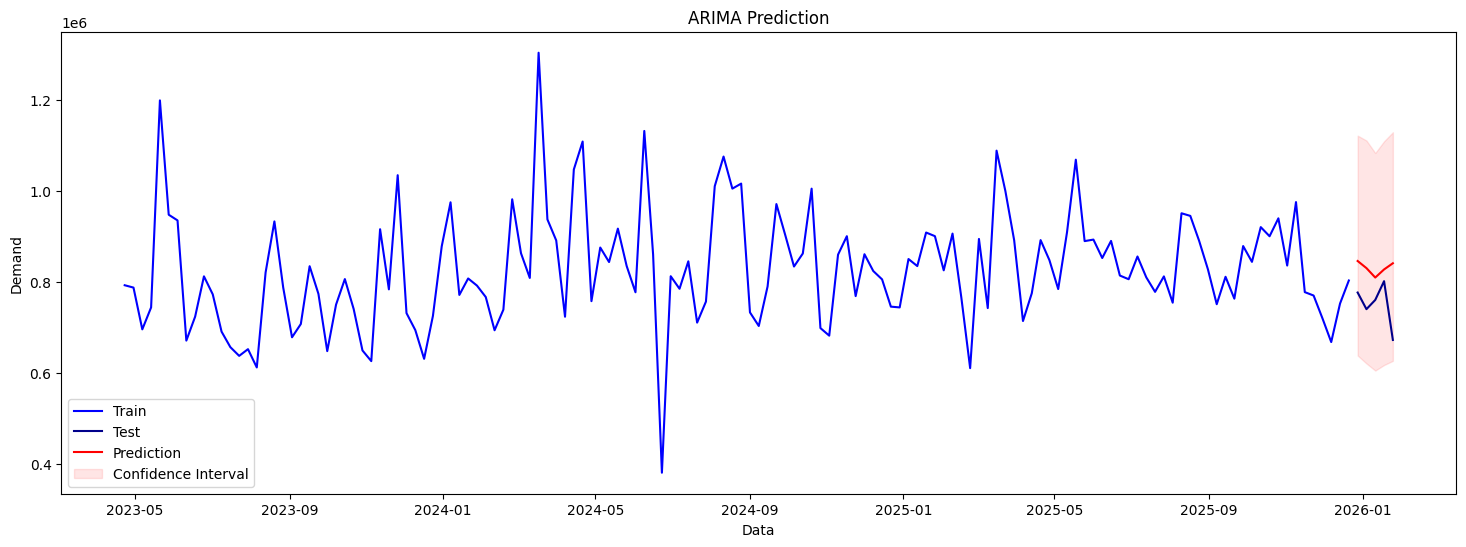

In [ ]:
# Plot
plt.figure(figsize = (18, 6))
plt.plot(df_train_real.index, df_train_real, label='Train', color='blue')
plt.plot(df_test_real.index, df_test_real, label='Test', color='darkblue')
plt.plot(forecast_real.index, forecast_real, label='Prediction', color='red')
plt.fill_between(conf_int_real.index, conf_int_real.iloc[:, 0], conf_int_real.iloc[:, 1], color='red', alpha=0.1, label='Confidence Interval')
plt.lim
plt.legend(loc='lower left')
plt.title('ARIMA Prediction')
plt.xlabel('Data')
plt.ylabel('Demand')
plt.show()

### Residuals Evaluation
First, we'll check the residuals from our prediction.

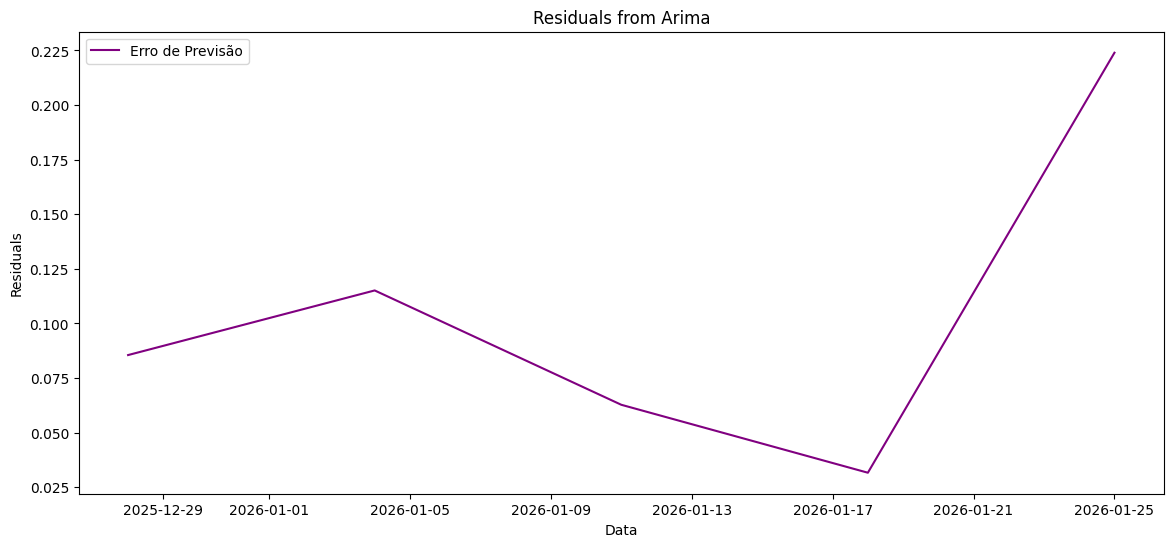

In [ ]:
# Check residuals
predict_error = (pred.predicted_mean - df_test)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(predict_error.index, predict_error, label='Erro de Previsão', color='purple')
plt.title('Residuals from Arima')
plt.xlabel('Data')
plt.ylabel('Residuals')
plt.legend()
plt.show()

**As we can see, the residuals are bigger starting on 2026-01-18, when our model didn't get it correct.**

Let's go deeper into the residuals to understand if it follows a normality and if they are a white residuals.

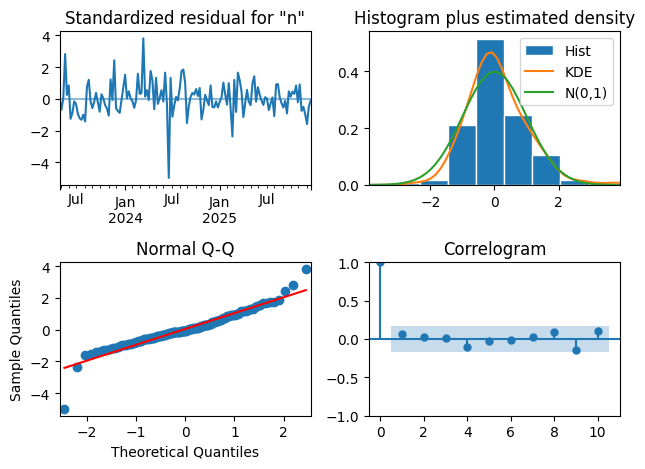

In [ ]:
final_model.plot_diagnostics()
plt.tight_layout()
plt.show()

Analysis of the result:
  1. Residual chart, showing that they are around zero
  2. The histogram looks to a normal (if comparing to the green line)
  3. The Q-Q plot the quantiles of our residuals are close to the thoerical ones
  4. There is no point in the correlogram outside the statistical zero with a 95% of confidence, so, no correlation among the residuals

**Let's crosscheck the statistical tests now, from Ljing-Box and Jarque-Bera**

In [ ]:
print(final_model.summary().tables[2])

Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):               138.38
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.27
Prob(H) (two-sided):                  0.39   Kurtosis:                         7.86


Let's dive in:

Ljung-Box Test

- **Null Hypothesis (H0)**: The residuals are independently distributed (no autocorrelation).
- **Alternative Hypothesis (HA)**: The residuals are not independently distributed (there is autocorrelation).

Jarque-Bera Test

- **Null Hypothesis (H0)**: The sample data follows a normal distribution.
- **Alternative Hypothesis (HA)**: The sample data does not follow a normal distribution.


Since our Ljung-Bo is 0.49, **we can't reject the null hyphotesis, so the residuals might be indepently distributed**.
For the Jarque-Bera test, our result is 0.00, so,** we can reject the hyphotesis of normal distribution, meaning that the residuals does not follow a normal distribution.**


### Metrics Evaluation - MSE & RMSE
Calculating the main metrics for regression, which are the Mean Square Error (MSE) and Rooth Mean Square Error (RMSE).

In [ ]:
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# List to store results
mse_scores = []

# Executing TimeSeriesSplit
for train_index, test_index in tscv.split(demand_log):
    # Splitting the data
    train, test = demand_log[train_index], demand_log[test_index]

    # Fitting the Simple Exponential Smoothing model
    final_model = ARIMA(train, order = (2,1,3)).fit()

    # Making predictions
    pred = final_model.get_prediction(start = test.index[0], end = test.index[-1])

    # Forecast
    forecast = pred.predicted_mean

    # Calculating the MSE
    mse = mean_squared_error(np.exp(test), np.exp(pred.predicted_mean))

    # Storing the result
    mse_scores.append(mse)

# Calculating the average MSE and RMSE
mean_mse = np.mean(mse_scores)
mean_rmse = np.sqrt(mean_mse)
proportion = mean_rmse / np.mean(np.exp(test)) * 100


# Displaying final results
print(f'Average MSE: {mean_mse}')
print(f'Average RMSE: {mean_rmse}')
print(f'Average Proportion: {proportion}%')

Average MSE: 15059196324.841099
Average RMSE: 122715.91716171581
Average Proportion: 15.091540353315857%


The values are not that good, since they are 15.09% different from the average value.

### Real Prediction
Lets predict the next 5 weeks of demand.

In [ ]:
# Train model
final_model = ARIMA(demand_log, order=(2, 1, 3)).fit()

# Start and end date
n = 5
start_date = demand_log.index[-1] + pd.DateOffset(weeks=1)
end_date = demand_log.index[-1] + pd.DateOffset(weeks=n)

# Prediction and forecast
pred = final_model.get_prediction(start=start_date, end=end_date)
forecast_log = pred.predicted_mean
confidence_int = pred.conf_int()

# Transformation to original
forecast_real = np.exp(forecast_log)
demand_real = np.exp(demand_log)
confidence_int_real = np.exp(confidence_int)

Now, let's plot our prediction for the next 5 weeks.

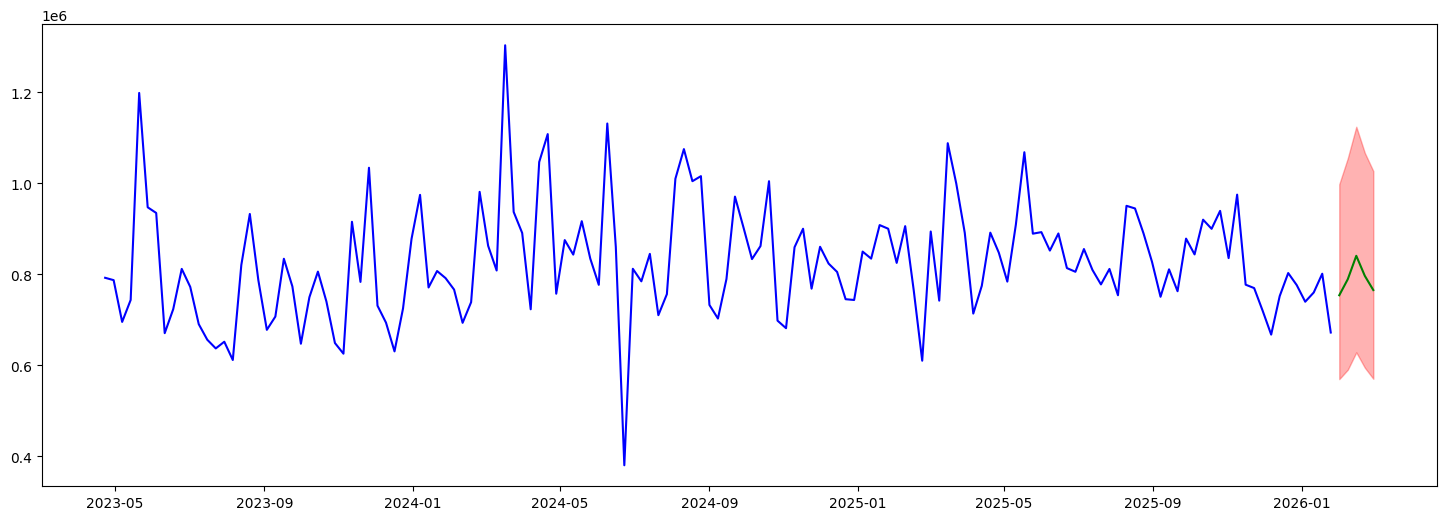

In [ ]:
# Plot
plt.figure(figsize = (18, 6))
plt.plot(demand_real, label = 'Observed', color = 'blue')
plt.plot(forecast_real, label = 'predicted', color = 'green')
plt.fill_between(confidence_int_real.index, confidence_int_real.iloc[:, 0], confidence_int_real.iloc[:, 1], color='red', alpha=0.3, label='Confidence Interval')
plt.show()

General step by step for the ARIMA.

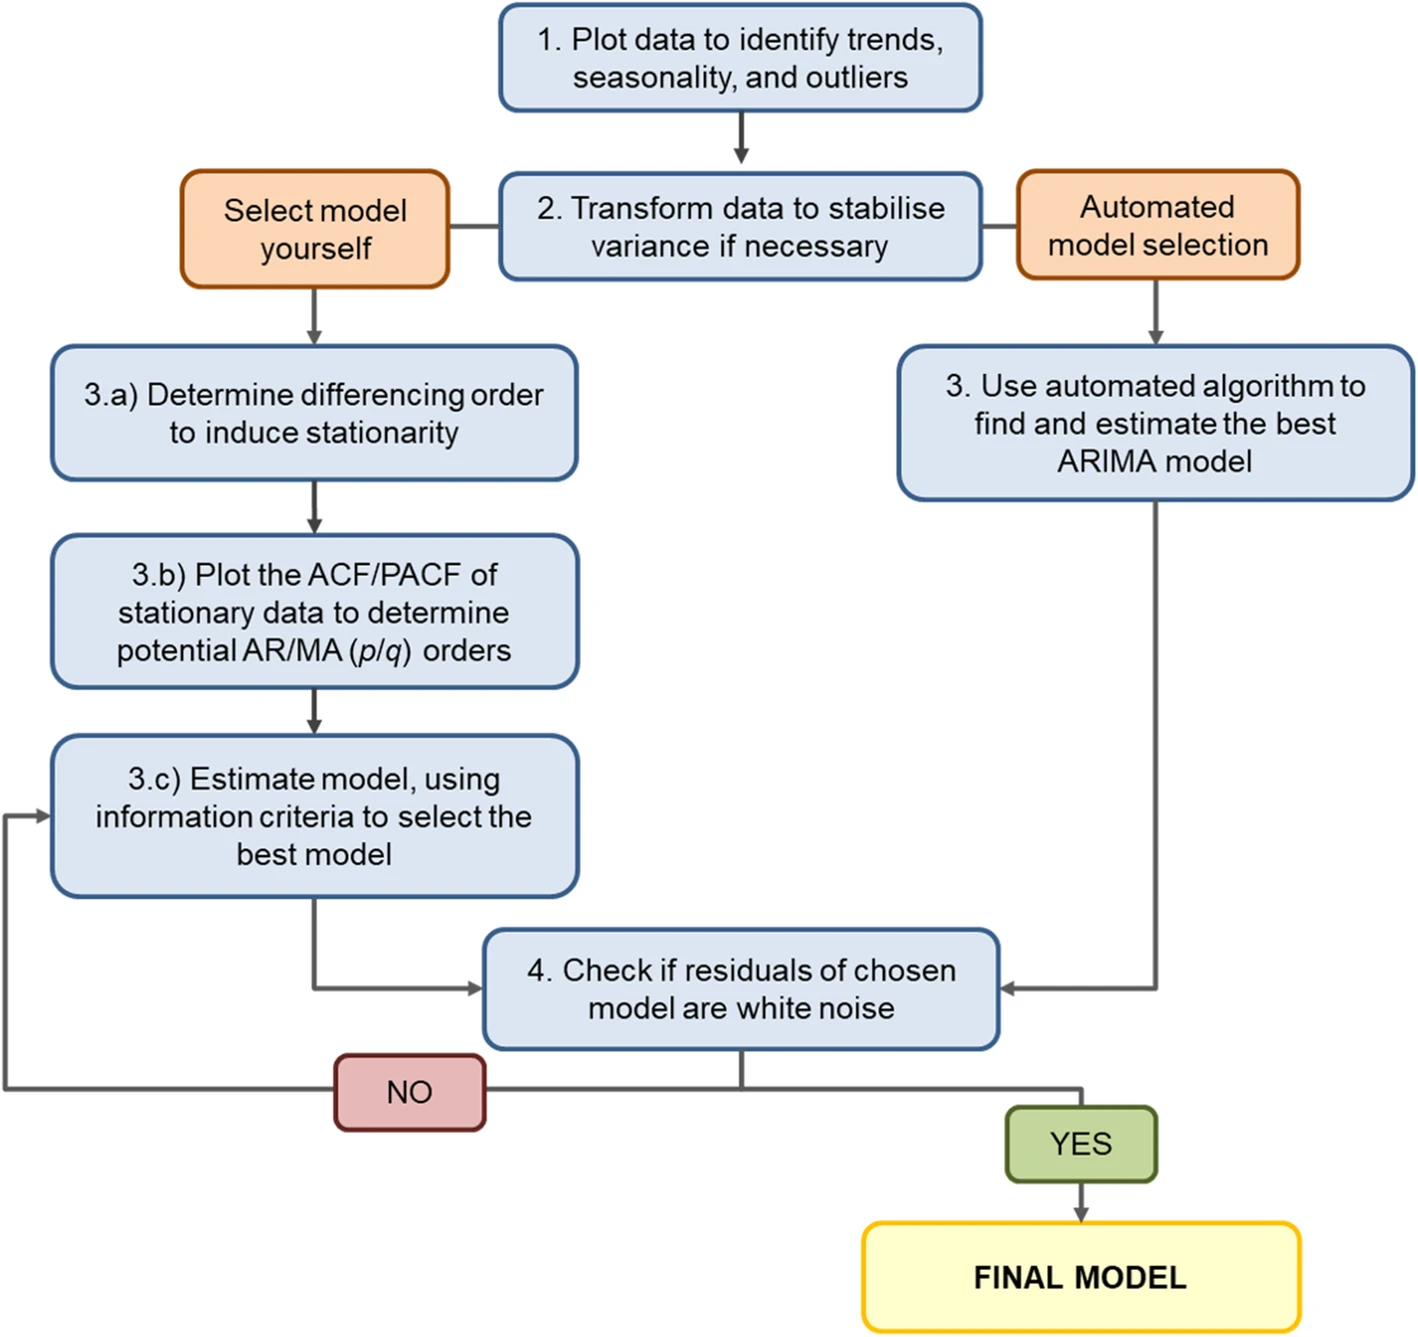